# Librerias y Configuraciones

In [53]:
import glob
from bs4 import BeautifulSoup
import os
import time
import datetime
from selenium import webdriver# I need to web scrap in chrome
from selenium.webdriver.support.select import Select # I need to select menu options
from random import randint
import pandas as pd
import numpy as np
from zipfile import ZipFile
pd.set_option('display.max_columns', 100)

# Funciones

In [19]:
def TransNum(Texto):
    Salida=Texto.replace(",","")
    return Salida
def leerarchivo(lugar):
    archi=open(lugar)
    temp='we'
    cuadros=""
    while temp != '':#lee todo
        temp=archi.readline()
        cuadros=cuadros+temp
    archi.close()
    return cuadros
def leerColumna(archivo,Sufijo):
    b=leerarchivo(archivo)
    soup=BeautifulSoup(b)
    Columns = []
    temp=[]
    table = soup.find_all('table')
    table_body = table[2].find('thead')
    rows = table_body.find_all('tr')
    for row in rows:
        cols = row.find_all('td')
        cols = [ele.text.strip() for ele in cols]
        Columns= ['Age', 'Month', 'Site']+[ele for ele in cols if ele]
        for k in range(7,len(Columns)):
            Columns[k]=Columns[k]+Sufijo    
    return(Columns)
def leerData(archivo,Columns,patron):
        temp2=archivo.replace("./ele_com_096/Data/","").replace(".html","").split("_")
        b=leerarchivo(archivo)
        soup=BeautifulSoup(b)
        data = []
        temp=[]
        table = soup.find_all('table')
        #print(table[2])  
        table_body = table[2].find('tbody')
        rows = table_body.find_all('tr')
        for row in rows:
            cols = row.find_all('td')
            cols = [ele.text.strip() for ele in cols]
            temp=[ele for ele in cols if ele]
            
            if 'ND' in set(temp[4:]) and len(set(temp[4:]))>1:
                data.append(temp2[:3]+temp)
        df = pd.DataFrame.from_records(data, columns=Columns)
        for ii in Columns[7:]:
            df[ii]=df[ii].apply(TransNum)
            df[ii]=pd.to_numeric(df[ii], errors='coerce')
        #df.info()
        df=df.drop(columns=['Variable Calculada', 'Total Residencial%s'%(patron),'Total No Residencial%s'%(patron)])
        return(df)
def SetPruebas(Data):
    Data.info()
    Data["Empresa"].value_counts()
def color_negative_red(val):
    if val < 0:
        color = 'red' 
    else:
        color ='black'
    
    return 'color: %s' % color 

def color_significant(val):
    if abs(val) > 0.3:
        color = 'yellow' 
    else:
        color = 'white' 
    return  'background-color: %s' % color 
def initSelenium():
    sistemaop = os.name
    if sistemaop=="posix":
        driver = webdriver.Chrome('./chromedriver')  # Optional argument, if not specified will search path.
    else: 
        driver = webdriver.Chrome('./chromedriver.exe')  # Optional argument, if not specified will search path.
    return driver


# Descarga de datos

In [4]:
url="http://reportes.sui.gov.co/fabricaReportes/frameSet.jsp?idreporte=ele_com_096"
#initSelenium()
sistemaop = os.name
if sistemaop=="posix":
    driver = webdriver.Chrome('./chromedriver')  # Optional argument, if not specified will search path.
else: 
    driver = webdriver.Chrome('./chromedriver.exe')  # Optional argument, if not specified will search path.

for i in range(16,18):#Counter Age
    time_delay = randint(10,19)
    time.sleep(time_delay)
    driver.get(url)#Goto web
    dheader=driver.find_element_by_xpath("//*[@id='header']")#Search Head
    driver.switch_to.frame(dheader)#Manipulate Head
    inputElementi = driver.find_element_by_xpath("/html/body/form/table/tbody/tr[4]/td/table/tbody/tr[1]/td[2]/select/option[%s]"%(str(i+1)))
    age=inputElementi.text
    for ii in range(3):
        inputElementii = driver.find_element_by_xpath("/html/body/form/table/tbody/tr[4]/td/table/tbody/tr[3]/td[2]/select/option[%s]"%(str(ii+1)))
        site=inputElementii.text
        for iii in [1,2,3]:
            inputElementiii = driver.find_element_by_xpath("/html/body/form/table/tbody/tr[4]/td/table/tbody/tr[7]/td[2]/select/option[%s]"%(str(iii)))
            data=inputElementiii.text
            for iiii in range(12):
                try:
                    inputElementiiii = driver.find_element_by_xpath("/html/body/form/table/tbody/tr[4]/td/table/tbody/tr[2]/td[2]/select/option[%s]"%(str(iiii+1)))
                    month=inputElementiiii.text
                    TEMP=age+"_"+month+"_"+site+"_"+data
                except:
                    continue
                try:
                    if os.path.exists("./ele_com_096/Data/"+TEMP+".html"):
                        print("Existe ./ele_com_096/Data/"+TEMP+".html")
                        time.sleep(1)
                        continue
                    nomonths=["Anual",'Trimestre 1','Trimestre 2','Trimestre 3','Trimestre 4','Semestre 1','Semestre 2']
                    if month in nomonths:
                        continue  
                    driver.get(url)
                    dheader=driver.find_element_by_xpath("//*[@id='header']")
                    driver.switch_to.frame(dheader)
                    inputElementi = driver.find_element_by_xpath("/html/body/form/table/tbody/tr[4]/td/table/tbody/tr[1]/td[2]/select/option[%s]"%(str(i+1)))
                    inputElementi.click()
                    inputElementii = driver.find_element_by_xpath("/html/body/form/table/tbody/tr[4]/td/table/tbody/tr[3]/td[2]/select/option[%s]"%(str(ii+1)))
                    inputElementii.click()
                    inputElementiii = driver.find_element_by_xpath("/html/body/form/table/tbody/tr[4]/td/table/tbody/tr[7]/td[2]/select/option[%s]"%(str(iii)))
                    inputElementiii.click()
                    inputElementiiii = driver.find_element_by_xpath("/html/body/form/table/tbody/tr[4]/td/table/tbody/tr[2]/td[2]/select/option[%s]"%(str(iiii+1)))
                    inputElementiiii.click()
                    inputElement = driver.find_element_by_xpath("/html/body/form/table/tbody/tr[3]/td[2]/table/tbody/tr/td/input[2]")
                    time.sleep(time_delay+5)
                    
                    inputElement.click()
                    print(1)
                    inputElement = driver.find_element_by_xpath("/html/body/form/table/tbody/tr[3]/td[2]/table/tbody/tr/td/input[2]")
                    time.sleep(time_delay)
                    print(2)
                    Botonhtml= driver.find_element_by_xpath("/html/body/form/table/tbody/tr[3]/td[2]/table/tbody/tr/td/input[4]")
                    Botonhtml.click()
                    print(3)
                    time.sleep(time_delay)
                    driver.switch_to.default_content()
                    dreport=driver.find_element_by_xpath("//*[@id='report']")
                    driver.switch_to.frame(dreport)
                    html = driver.page_source
                    file2 = open("./ele_com_096/Data/"+TEMP+".html","w+")
                    file2.write(html)
                    file2.close()
                    driver.switch_to.default_content()
                    dheader=driver.find_element_by_xpath("//*[@id='header']")
                    driver.switch_to.frame(dheader)
                except:
                    print(TEMP)

Existe ./ele_com_096/Data/2019_Enero_Rural_Suscriptores.html
Existe ./ele_com_096/Data/2019_Febrero_Rural_Suscriptores.html
Existe ./ele_com_096/Data/2019_Marzo_Rural_Suscriptores.html
Existe ./ele_com_096/Data/2019_Abril_Rural_Suscriptores.html
Existe ./ele_com_096/Data/2019_Mayo_Rural_Suscriptores.html
Existe ./ele_com_096/Data/2019_Junio_Rural_Suscriptores.html
Existe ./ele_com_096/Data/2019_Julio_Rural_Suscriptores.html
Existe ./ele_com_096/Data/2019_Agosto_Rural_Suscriptores.html
1
2
3
1
2
3
1
2
3
1
2
3
Existe ./ele_com_096/Data/2019_Enero_Rural_Consumo.html
Existe ./ele_com_096/Data/2019_Febrero_Rural_Consumo.html
Existe ./ele_com_096/Data/2019_Marzo_Rural_Consumo.html
Existe ./ele_com_096/Data/2019_Abril_Rural_Consumo.html
Existe ./ele_com_096/Data/2019_Mayo_Rural_Consumo.html
Existe ./ele_com_096/Data/2019_Junio_Rural_Consumo.html
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
Existe ./ele_com_096/Data/2019_Enero_Rural_Valor Consumo.html
Existe ./ele_com_096/Data/2019_Febrero_Rural_Valor 

# Stadistics DataBase

In [20]:
a=glob.glob("./ele_com_096/Data/*.html")
len(a)
iii=[]
SetData=glob.glob("./ele_com_096/Data/*_Suscriptores.html")#["./Data/2009_Enero_Rural_Suscriptores.html","./Data/2013_Enero_Rural_Suscriptores.html"]
cont3=len(SetData)
Total=cont3
for i in a:
    ii=i.replace("./ele_com_096/Data/","").replace(".html","").split("_")
    iii=iii+ii
iii=set(iii)
for i in iii:
    a=len(glob.glob("./ele_com_096/Data/*%s*.html"%(i)))
    print( "La etiqueta %s posee %s sets"%(i,a))
SetData=glob.glob("./ele_com_096/Data/*_Suscriptores.html")
TypeData=["_Suscriptores","_Consumo","_Valor Consumo"]
for i1 in SetData: 
    cont3=cont3-1
    for i2 in TypeData:
        i3=i1.replace("_Suscriptores",i2)
        if not os.path.isfile(i3):
            print(i3)
#Verifica Si hay archivos faltantes
SetData=glob.glob("./ele_com_096/Data/*_Suscriptores.html")
TypeData=["_Suscriptores","_Consumo","_Valor Consumo"]
archivosaeliminar=[]
for i in SetData:
    for j in TypeData:
        if not os.path.exists(i.replace("_Suscriptores",j)):
            archivosaeliminar.append(i)
print(set(archivosaeliminar))

La etiqueta 2018 posee 108 sets
La etiqueta 2012 posee 108 sets
La etiqueta Consumo posee 1278 sets
La etiqueta Suscriptores posee 639 sets
La etiqueta 2003 posee 108 sets
La etiqueta 2005 posee 108 sets
La etiqueta Diciembre posee 153 sets
La etiqueta 2011 posee 108 sets
La etiqueta 2009 posee 108 sets
La etiqueta 2014 posee 108 sets
La etiqueta Noviembre posee 153 sets
La etiqueta 2007 posee 108 sets
La etiqueta Julio posee 162 sets
La etiqueta Valor Consumo posee 639 sets
La etiqueta Abril posee 162 sets
La etiqueta 2006 posee 108 sets
La etiqueta 2016 posee 108 sets
La etiqueta Octubre posee 153 sets
La etiqueta 2004 posee 108 sets
La etiqueta Junio posee 162 sets
La etiqueta 2015 posee 108 sets
La etiqueta Rural posee 639 sets
La etiqueta Enero posee 162 sets
La etiqueta 2013 posee 108 sets
La etiqueta Urbano posee 639 sets
La etiqueta 2019 posee 108 sets
La etiqueta 2017 posee 108 sets
La etiqueta Febrero posee 162 sets
La etiqueta Mayo posee 162 sets
La etiqueta Agosto posee 162

# Carga de base de datos en Memoria

In [35]:
SetData=glob.glob("./ele_com_096/Data/*_Suscriptores.html")#["./Data/2009_Enero_Rural_Suscriptores.html","./Data/2013_Enero_Rural_Suscriptores.html"]
cont3=len(SetData)
Total=cont3
TiempoFin=0
TypeData=["_Suscriptores","_Consumo","_Valor Consumo"]
cont2=0
TiempoInit=datetime.datetime.now()
for i1 in SetData:
    
    cont3=cont3-1
    cont=0
    for i2 in TypeData:
        i3=i1.replace("_Suscriptores",i2)
        Temp1=leerColumna(i3,i2)
        Tabla=leerData(i3,Temp1,i2)
        if cont==0:
            FinalT=Tabla
            cont=cont+1
        else:
            FinalT=FinalT.merge(Tabla,on=['Age', 'Month', 'Site', 'Departamento', 'Municipio', 'Empresa'], suffixes=("ty", "fg"))
            cont=cont+1
    if cont2==0:
        FinalM=FinalT
        cont2=cont2+1

    else:
        FinalM=pd.concat([FinalM, FinalT])
        cont2=cont2+1
    TiempoFin=datetime.datetime.now()
    if cont3 %25==0:
        Estimador=(TiempoFin-TiempoInit)*cont3/(Total-cont3)
        TiemporPorData=(TiempoFin-TiempoInit)/(Total-cont3)
        print(Estimador,cont3, datetime.datetime.now()+ Estimador)

1:52:31.432098 625 2020-11-09 17:08:51.391375
1:46:30.448954 600 2020-11-09 17:07:14.555334
1:40:04.409163 575 2020-11-09 17:05:01.453209
1:36:19.643823 550 2020-11-09 17:05:43.622479
1:31:53.244943 525 2020-11-09 17:05:39.133903
1:28:18.336241 500 2020-11-09 17:06:40.000918
1:24:17.695601 475 2020-11-09 17:07:12.658754
1:19:27.770026 450 2020-11-09 17:06:38.960636
1:15:19.670480 425 2020-11-09 17:07:04.184696
1:10:56.094407 400 2020-11-09 17:07:07.838016
1:06:39.393226 375 2020-11-09 17:07:23.693271
1:02:36.120247 350 2020-11-09 17:08:06.329593
0:58:17.069776 325 2020-11-09 17:08:24.504393
0:54:02.140512 300 2020-11-09 17:08:54.486502
0:49:40.979757 275 2020-11-09 17:09:15.440161
0:45:20.059856 250 2020-11-09 17:09:41.200190
0:40:48.330961 225 2020-11-09 17:09:41.987141
0:36:13.181235 200 2020-11-09 17:09:32.041247
0:31:38.975007 175 2020-11-09 17:09:22.698799
0:27:06.993566 150 2020-11-09 17:09:19.719789
0:22:42.361380 125 2020-11-09 17:09:53.118574
0:18:12.548701 100 2020-11-09 17:1

In [37]:
FinalM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 626476 entries, 0 to 1007
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       626476 non-null  object 
 1   Month                     626476 non-null  object 
 2   Site                      626476 non-null  object 
 3   Departamento              626476 non-null  object 
 4   Municipio                 626476 non-null  object 
 5   Empresa                   626476 non-null  object 
 6   Estrato 1_Suscriptores    376131 non-null  float64
 7   Estrato 2_Suscriptores    370945 non-null  float64
 8   Estrato 3_Suscriptores    287641 non-null  float64
 9   Estrato 4_Suscriptores    143353 non-null  float64
 10  Estrato 5_Suscriptores    40354 non-null   float64
 11  Estrato 6_Suscriptores    30675 non-null   float64
 12  Industrial_Suscriptores   409890 non-null  float64
 13  Comercial_Suscriptores    481188 non-null  flo

In [38]:
FinalM.to_csv(path_or_buf="./DataSui_ele_com_096.csv", sep=',', na_rep='',header=True, index=True, decimal='.')

# Pruebas en base de datos

In [39]:
FinalM["Empresa"].value_counts()

ELECTRIFICADORA DEL CARIBE S.A. E.S.P.                                                        54466
EMPRESAS PÚBLICAS DE MEDELLIN E.S.P.                                                          51041
CODENSA S.A. ESP                                                                              43157
EMPRESA DE ENERGIA DE BOYACA S.A. ESP EMPRESA DE SERVICIOS PUBLICOS                           38162
VATIA S.A. E.S.P.                                                                             36315
                                                                                              ...  
ENERGETICOS S.A.S.  E.S.P. DISTRIBUIDORA Y COMERCIALIZADORA DE ENERGIA GAS E HIDROCARBUROS       10
Empresa Prestadora de Servicios Publicos ECO LOGICA S.A.S. E.S.P.                                 5
COLOMBINA ENERGIA SAS ESP                                                                         5
TERMOVALLE S.A.S. E.S.P                                                                           5


In [40]:
FinalM["Departamento"].value_counts()

CUNDINAMARCA          98793
ANTIOQUIA             64120
BOYACA                50999
SANTANDER             45362
VALLE DEL CAUCA       37443
NARINO                28326
TOLIMA                27325
CAUCA                 26279
BOLIVAR               23396
CORDOBA               19593
NORTE DE SANTANDER    18983
MAGDALENA             18255
ATLANTICO             17857
CESAR                 17709
CALDAS                17088
HUILA                 16531
SUCRE                 15833
META                  14411
RISARALDA             12158
CASANARE               8808
CHOCO                  8161
LA GUAJIRA             7835
PUTUMAYO               7695
QUINDIO                7083
CAQUETA                7072
BOGOTA, D.C.           4866
ARAUCA                 3721
GUAVIARE                774
Name: Departamento, dtype: int64

In [41]:
FinalM["Municipio"].value_counts()

BOGOTA, D.C.         4866
CALI                 3204
MOSQUERA             3035
BARRANQUILLA         2991
MADRID               2927
                     ... 
NOROSI                 46
CARMEN DE APICALA      36
ACANDI                  9
MURINDO                 5
BAHIA SOLANO            1
Name: Municipio, Length: 994, dtype: int64

In [42]:
FinalM["Site"].value_counts()

Urbano            370527
Rural             229389
Centro Poblado     26560
Name: Site, dtype: int64

In [43]:
FinalM["Month"].value_counts()

Marzo         53969
Enero         53436
Septiembre    53284
Diciembre     52848
Junio         52670
Abril         52354
Febrero       51814
Mayo          51751
Agosto        51492
Julio         51111
Octubre       50880
Noviembre     50867
Name: Month, dtype: int64

In [44]:
FinalM["Age"].value_counts()

2019    41893
2018    40048
2014    39574
2015    39210
2013    39104
2017    37686
2016    37549
2009    36912
2010    36557
2008    36055
2012    35867
2011    34288
2007    34013
2005    32604
2006    31259
2004    29875
2003    28422
2020    15560
Name: Age, dtype: int64

In [45]:
FinalM.describe()

,Estrato 1_Suscriptores,Estrato 2_Suscriptores,Estrato 3_Suscriptores,Estrato 4_Suscriptores,Estrato 5_Suscriptores,Estrato 6_Suscriptores,Industrial_Suscriptores,Comercial_Suscriptores,Oficial_Suscriptores,Otros_Suscriptores,Estrato 1_Consumo,Estrato 2_Consumo,Estrato 3_Consumo,Estrato 4_Consumo,Estrato 5_Consumo,Estrato 6_Consumo,Industrial_Consumo,Comercial_Consumo,Oficial_Consumo,Otros_Consumo,Estrato 1_Valor Consumo,Estrato 2_Valor Consumo,Estrato 3_Valor Consumo,Estrato 4_Valor Consumo,Estrato 5_Valor Consumo,Estrato 6_Valor Consumo,Industrial_Valor Consumo,Comercial_Valor Consumo,Oficial_Valor Consumo,Otros_Valor Consumo
count,376131.000000,370945.000000,287641.000000,143353.000000,40354.000000,30675.000000,409890.000000,481188.000000,375285.000000,318869.000000,3.761310e+05,3.709450e+05,2.876410e+05,1.433530e+05,4.035400e+04,3.067500e+04,4.098900e+05,4.811880e+05,3.752850e+05,3.188690e+05,3.761310e+05,3.709450e+05,2.876410e+05,1.433530e+05,4.035400e+04,3.067500e+04,4.098900e+05,4.811880e+05,3.752850e+05,3.188690e+05
mean,988.308217,1015.846255,432.318098,117.651225,82.704242,40.462135,14.440340,117.882054,19.475636,12.356817,1.420354e+05,1.309610e+05,6.196463e+04,2.151200e+04,1.893911e+04,1.827853e+04,4.671338e+05,1.466485e+05,3.547357e+04,6.271487e+04,5.577161e+07,5.024617e+07,2.336033e+07,8.097832e+06,6.582948e+06,5.551301e+06,1.015818e+08,5.340244e+07,1.070231e+07,1.946448e+07
std,2660.543310,2701.687083,2667.789075,994.139718,749.177408,451.526930,137.648218,845.631131,31.010873,35.928600,5.364171e+05,4.578457e+05,3.777429e+05,1.897517e+05,1.774095e+05,1.767965e+05,7.139018e+06,2.131494e+06,1.575096e+06,1.440265e+06,2.321472e+08,1.780661e+08,1.383672e+08,6.615377e+07,5.437983e+07,4.860416e+07,1.044174e+09,2.077396e+09,7.653792e+07,3.103655e+08
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.630230e+05,-1.158920e+05,-4.813600e+04,-1.074000e+03,0.000000e+00,0.000000e+00,-1.145670e+08,-6.703726e+07,-1.249238e+08,-2.876387e+07,-1.056726e+09,-3.633487e+08,-4.216667e+08,-3.225949e+07,-4.844143e+06,-5.248107e+06,-4.658411e+08,-4.454326e+08,-6.058762e+08,-2.258890e+08
25%,52.000000,153.000000,5.000000,2.000000,1.000000,1.000000,1.000000,3.000000,6.000000,1.000000,4.055000e+03,1.362700e+04,6.570000e+02,2.540000e+02,2.110000e+02,1.690000e+02,2.043000e+03,3.768000e+03,1.678000e+03,2.412000e+03,1.457042e+06,5.028844e+06,2.499660e+05,9.574100e+04,7.442625e+04,5.935400e+04,7.265935e+05,1.369144e+06,6.028090e+05,8.293650e+05
50%,285.000000,461.000000,30.000000,5.000000,3.000000,2.000000,3.000000,15.000000,13.000000,4.000000,2.433400e+04,4.061300e+04,3.937000e+03,1.039000e+03,8.690000e+02,7.040000e+02,1.657600e+04,1.547400e+04,4.906000e+03,1.095400e+04,8.934935e+06,1.523924e+07,1.484654e+06,3.845140e+05,3.237160e+05,2.431870e+05,5.601820e+06,5.504649e+06,1.790822e+06,3.611297e+06
75%,928.000000,1069.000000,182.000000,23.000000,14.000000,7.000000,10.000000,68.000000,24.000000,12.000000,9.734150e+04,1.109090e+05,2.520700e+04,4.822000e+03,4.359750e+03,3.136000e+03,1.172435e+05,5.855200e+04,1.474600e+04,3.517000e+04,3.632914e+07,4.071124e+07,9.171905e+06,1.717660e+06,1.557104e+06,1.076370e+06,3.295661e+07,1.975315e+07,5.454990e+06,1.157674e+07
max,119463.000000,599175.000000,619346.000000,225132.000000,78768.000000,63078.000000,27178.000000,166945.000000,3940.000000,1717.000000,3.071281e+07,9.329723e+07,1.010801e+08,3.958043e+07,1.782942e+07,2.042590e+07,4.120560e+09,1.057159e+09,8.903453e+08,5.971390e+08,2.512088e+10,3.094194e+10,3.343275e+10,1.299253e+10,6.499592e+09,6.739433e+09,4.715174e+11,1.195987e+12,2.487364e+10,9.876588e+10


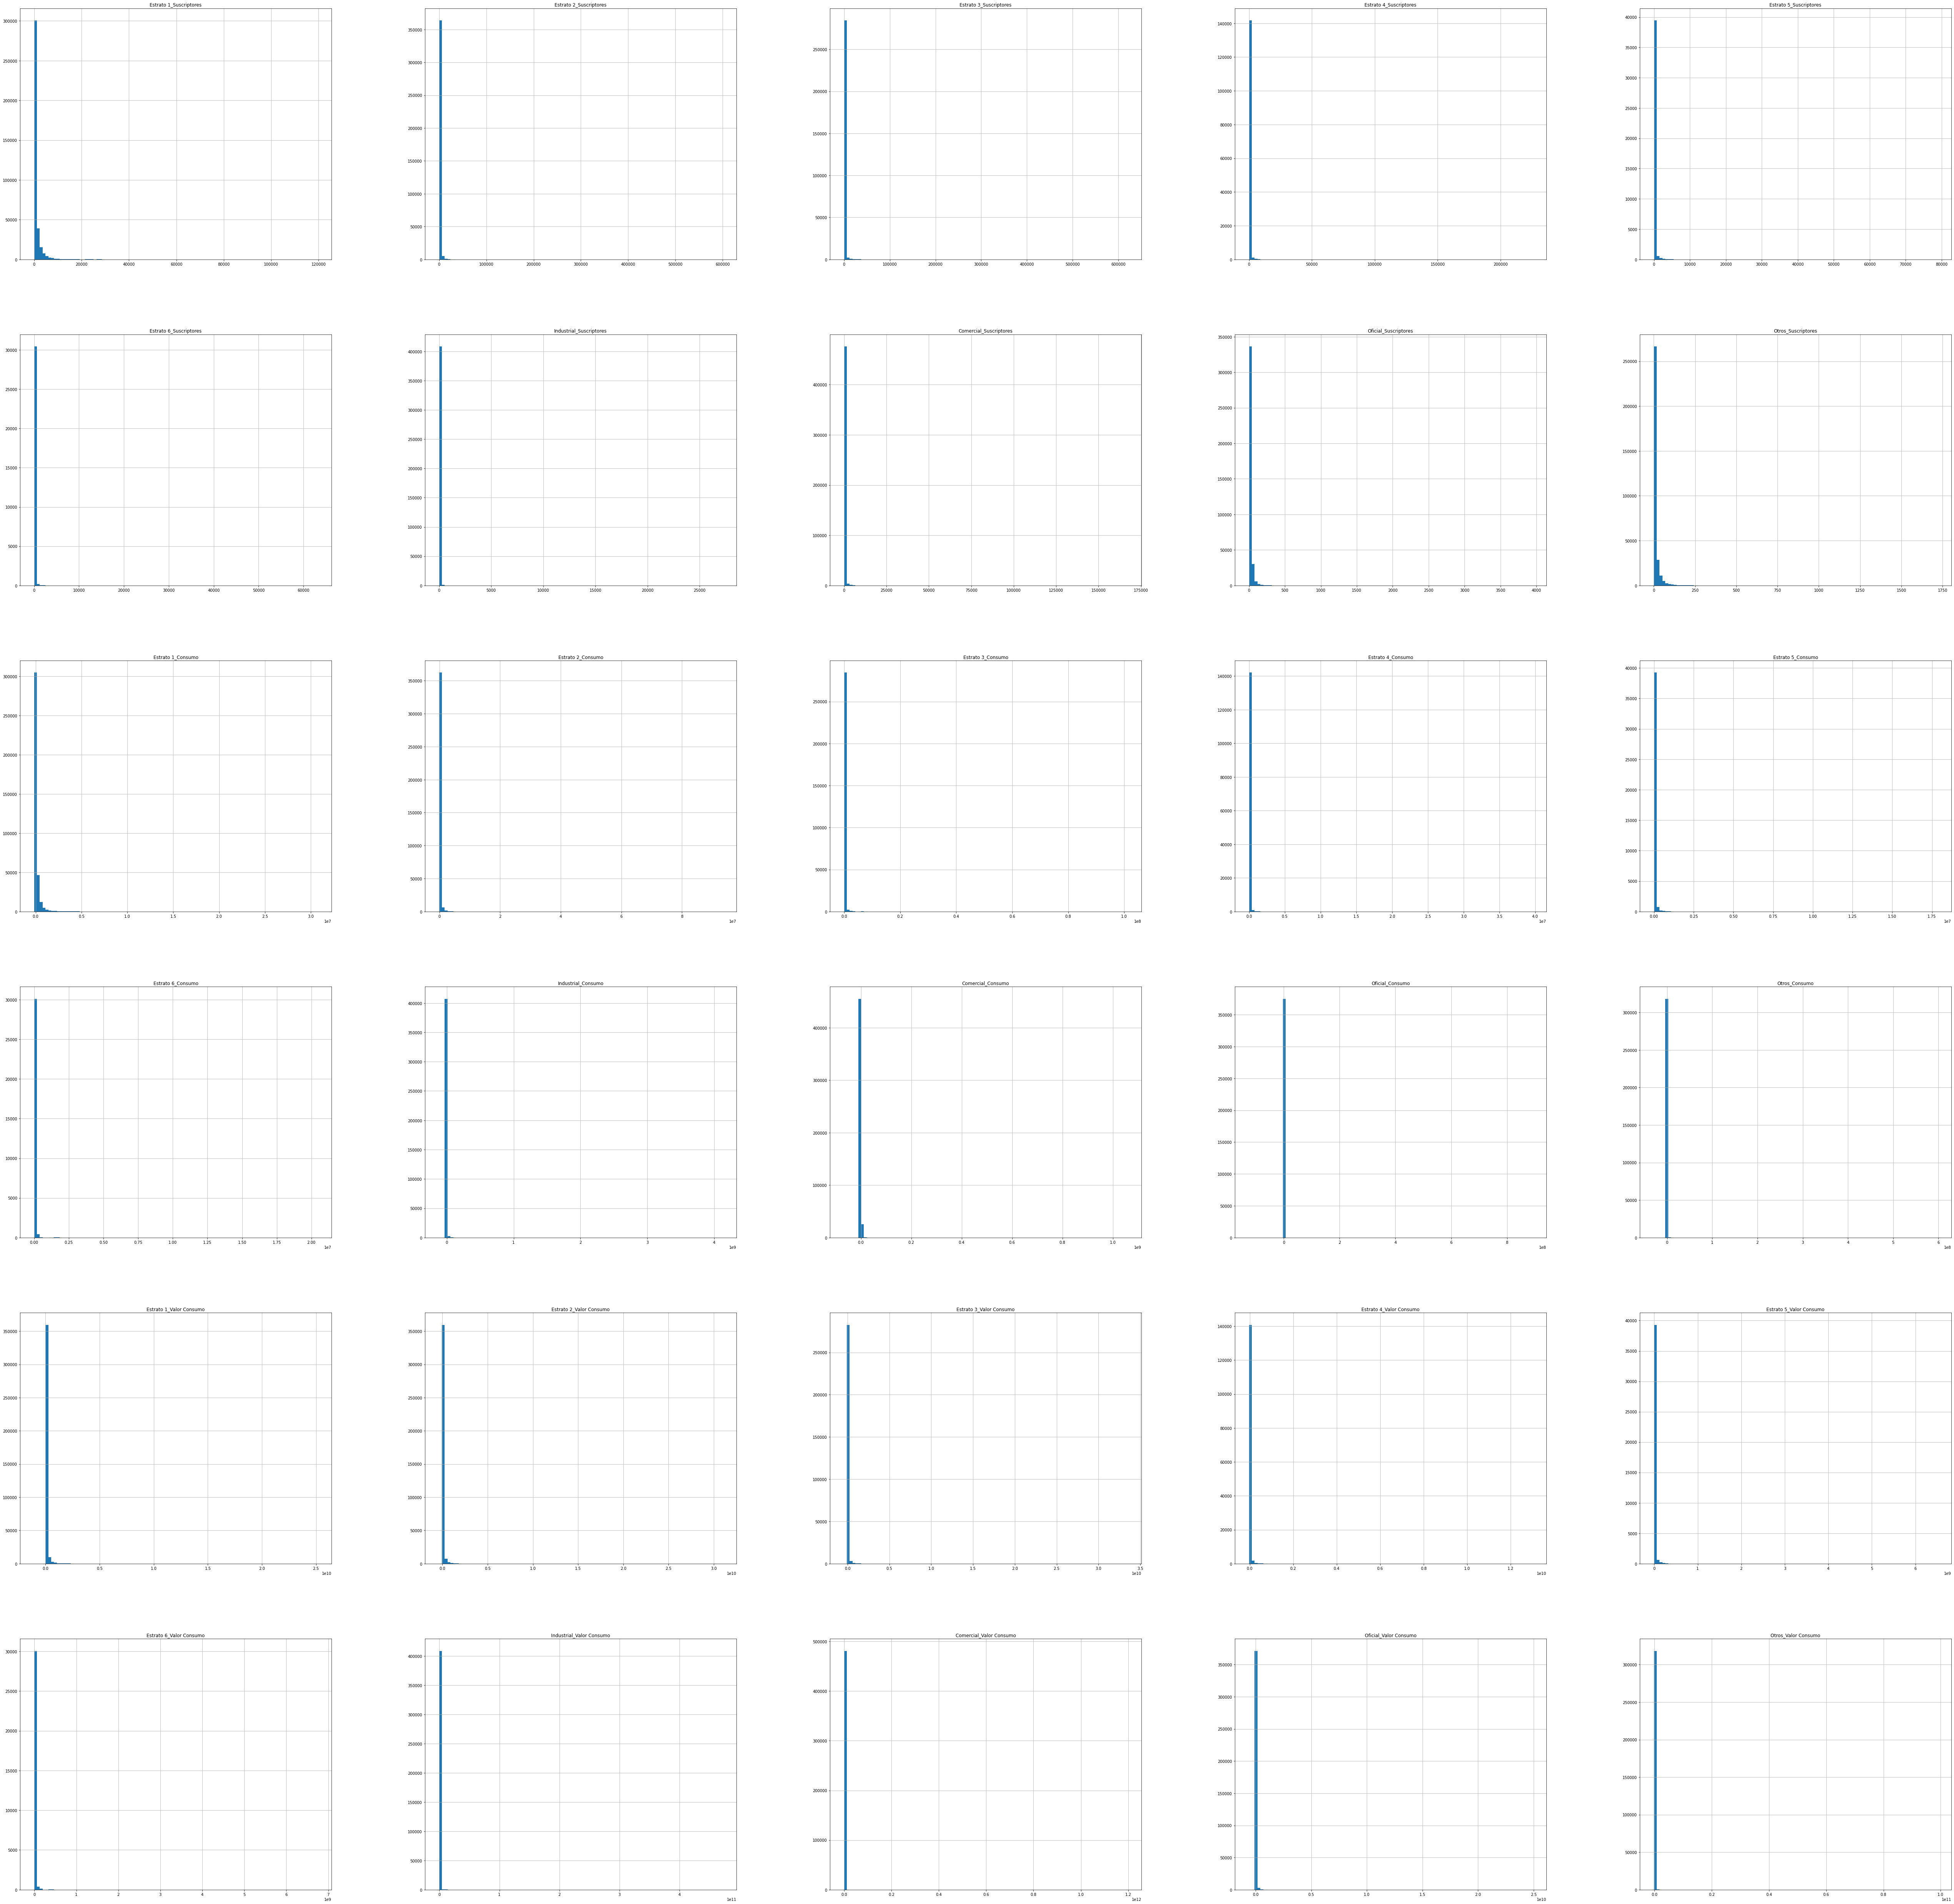

In [46]:
import matplotlib.pyplot as plt
FinalM.hist(bins=100, figsize=(90,90))
plt.savefig ('grafico01.png')

In [47]:
FinalM.corr(method="kendall" ).style.applymap(color_negative_red).applymap(color_significant)

,Estrato 1_Suscriptores,Estrato 2_Suscriptores,Estrato 3_Suscriptores,Estrato 4_Suscriptores,Estrato 5_Suscriptores,Estrato 6_Suscriptores,Industrial_Suscriptores,Comercial_Suscriptores,Oficial_Suscriptores,Otros_Suscriptores,Estrato 1_Consumo,Estrato 2_Consumo,Estrato 3_Consumo,Estrato 4_Consumo,Estrato 5_Consumo,Estrato 6_Consumo,Industrial_Consumo,Comercial_Consumo,Oficial_Consumo,Otros_Consumo,Estrato 1_Valor Consumo,Estrato 2_Valor Consumo,Estrato 3_Valor Consumo,Estrato 4_Valor Consumo,Estrato 5_Valor Consumo,Estrato 6_Valor Consumo,Industrial_Valor Consumo,Comercial_Valor Consumo,Oficial_Valor Consumo,Otros_Valor Consumo
Estrato 1_Suscriptores,1.000000,0.170638,0.151495,0.113381,0.122997,0.071154,0.088990,0.266548,0.252322,0.359973,0.799553,0.221245,0.186544,0.134424,0.111857,0.077074,0.145251,0.270277,0.284362,0.251512,0.806900,0.236071,0.197924,0.147634,0.124697,0.086216,0.152316,0.274510,0.287375,0.260833
Estrato 2_Suscriptores,0.170638,1.000000,0.401602,0.227229,0.167676,-0.030681,0.319198,0.455016,0.368623,0.240545,0.144410,0.769430,0.376332,0.198502,0.130982,-0.027318,0.261337,0.411514,0.333688,0.240316,0.147120,0.762558,0.385803,0.206308,0.138551,-0.024243,0.262675,0.405250,0.329648,0.242939
Estrato 3_Suscriptores,0.151495,0.401602,1.000000,0.385553,0.290623,0.084945,0.284113,0.482289,0.344127,0.134008,0.141283,0.377234,0.817516,0.316925,0.241772,0.070957,0.220839,0.399898,0.342936,0.199070,0.137031,0.364803,0.819392,0.318684,0.247743,0.074145,0.218322,0.386318,0.334066,0.197011
Estrato 4_Suscriptores,0.113381,0.227229,0.385553,1.000000,0.463188,0.322990,0.241792,0.270161,0.182544,0.168132,0.116506,0.231218,0.387366,0.706025,0.375663,0.234050,0.233810,0.291521,0.207639,0.164859,0.113502,0.222598,0.387156,0.713377,0.384159,0.237631,0.229206,0.281327,0.199371,0.168012
Estrato 5_Suscriptores,0.122997,0.167676,0.290623,0.463188,1.000000,0.476060,0.193603,0.207041,0.116355,0.179331,0.112062,0.168280,0.294996,0.413783,0.673311,0.428994,0.236442,0.263191,0.150837,0.132491,0.107379,0.161178,0.290614,0.409968,0.675011,0.428369,0.231476,0.249427,0.141474,0.137866
Estrato 6_Suscriptores,0.071154,-0.030681,0.084945,0.322990,0.476060,1.000000,0.162324,0.073949,-0.129195,0.088753,0.088714,0.009346,0.125267,0.344892,0.429731,0.601387,0.230275,0.183427,0.041751,0.160081,0.078197,-0.002983,0.112310,0.337514,0.429577,0.602709,0.226078,0.170617,0.026555,0.155037
Industrial_Suscriptores,0.088990,0.319198,0.284113,0.241792,0.193603,0.162324,1.000000,0.361764,0.255701,0.133826,0.087216,0.310795,0.287351,0.233138,0.186398,0.163897,0.205123,0.265038,0.253913,0.124986,0.090761,0.314145,0.293123,0.240369,0.195638,0.169173,0.220902,0.267288,0.255706,0.129975
Comercial_Suscriptores,0.266548,0.455016,0.482289,0.270161,0.207041,0.073949,0.361764,1.000000,0.387647,0.271915,0.257337,0.490212,0.484360,0.258740,0.190933,0.083559,0.126672,0.392931,0.472821,0.314709,0.267984,0.510748,0.505487,0.274295,0.207195,0.096258,0.138000,0.409712,0.482133,0.330011
Oficial_Suscriptores,0.252322,0.368623,0.344127,0.182544,0.116355,-0.129195,0.255701,0.387647,1.000000,0.057476,0.200601,0.313943,0.318287,0.135065,0.135103,-0.090062,0.143953,0.245791,0.422959,0.150063,0.208499,0.327599,0.330725,0.147443,0.145177,-0.081861,0.154052,0.258100,0.438610,0.158869
Otros_Suscriptores,0.359973,0.240545,0.134008,0.168132,0.179331,0.088753,0.133826,0.271915,0.057476,1.000000,0.341530,0.266898,0.156148,0.166166,0.131579,0.028051,0.158776,0.266196,0.149497,0.261291,0.357070,0.286417,0.168958,0.175781,0.144815,0.036349,0.169605,0.277081,0.156310,0.284689


# Exportar Base de datos

# Calculos Adicionales

In [49]:
len(FinalM)#.columns[6:16]
jkl=FinalM.iloc[5]
jkl

Age                                                              2016
Month                                                           Julio
Site                                                           Urbano
Departamento                                                   NARINO
Municipio                                                     IPIALES
Empresa                     A.S.C INGENIERIA SOCIEDAD ANONIMA SA ESP.
Estrato 1_Suscriptores                                            NaN
Estrato 2_Suscriptores                                            NaN
Estrato 3_Suscriptores                                            NaN
Estrato 4_Suscriptores                                             86
Estrato 5_Suscriptores                                            NaN
Estrato 6_Suscriptores                                            NaN
Industrial_Suscriptores                                             1
Comercial_Suscriptores                                              5
Oficial_Suscriptores

# Analisis por municipio

In [50]:
V=FinalM#[FinalM["Municipio"]=="GUACARI"]
table = pd.pivot_table(V, index=['Age', 'Month', 'Site', 'Departamento', 'Municipio', 'Empresa'], values=['Estrato 1_Suscriptores', 'Estrato 2_Suscriptores',
       'Estrato 3_Suscriptores', 'Estrato 4_Suscriptores',
       'Estrato 5_Suscriptores', 'Estrato 6_Suscriptores',
       'Industrial_Suscriptores', 'Comercial_Suscriptores',
       'Oficial_Suscriptores', 'Otros_Suscriptores', 'Estrato 1_Consumo',
       'Estrato 2_Consumo', 'Estrato 3_Consumo', 'Estrato 4_Consumo',
       'Estrato 5_Consumo', 'Estrato 6_Consumo', 'Industrial_Consumo',
       'Comercial_Consumo', 'Oficial_Consumo', 'Otros_Consumo',
       'Estrato 1_Valor Consumo', 'Estrato 2_Valor Consumo',
       'Estrato 3_Valor Consumo', 'Estrato 4_Valor Consumo',
       'Estrato 5_Valor Consumo', 'Estrato 6_Valor Consumo',
       'Industrial_Valor Consumo', 'Comercial_Valor Consumo',
       'Oficial_Valor Consumo', 'Otros_Valor Consumo'],aggfunc=np.sum)
table2 = pd.pivot_table(V, index=['Age','Departamento', 'Municipio'], values=[ 'Comercial_Suscriptores',
       'Comercial_Consumo', 'Comercial_Valor Consumo'],aggfunc=np.sum)

In [51]:
table2

Comercial_Consumo  Comercial_Suscriptores  \
Age  Departamento    Municipio                                               
2003 ANTIOQUIA       ABEJORRAL            565599.0                  4732.0   
                     ABRIAQUI              18658.0                   233.0   
                     ALEJANDRIA           141557.0                  1197.0   
                     AMAGA               1395142.0                  5143.0   
                     AMALFI               648824.0                  3277.0   
...                                            ...                     ...   
2020 VALLE DEL CAUCA VERSALLES             21841.0                    86.0   
                     VIJES                143598.0                    99.0   
                     YOTOCO               122140.0                   115.0   
                     YUMBO              25286742.0                  1465.0   
                     ZARZAL               508904.0                   562.0   

                                 Comercial_Valor Consumo  
Age  Departamento    Municipio                            
2003 ANTIOQUIA       ABEJORRAL              1.724846e+08  
                     ABRIAQUI               5.797530e+06  
                     ALEJANDRIA             4.395203e+07  
                     AMAGA                  4.262475e+08  
                     AMALFI                 2.016561e+08  
...                                                  ...  
2020 VALLE DEL CAUCA VERSALLES              1.232549e+07  
                     VIJES                  7.406224e+07  
                     YOTOCO                 6.349110e+07  
                     YUMBO                  7.539403e+10  
                     ZARZAL                 2.586443e+08  

[18948 rows x 3 columns]

In [52]:
table2["TarifaMedia"]=table2['Comercial_Valor Consumo']/(table2['Comercial_Consumo'])

In [54]:
myzip = ZipFile('DataSui_ele_com_096.zip', 'w')
myzip.write('DataSui_ele_com_096.csv')
myzip.close()

In [55]:
import bz2
f_in = open("DataSui_ele_com_096.csv", "rb")
f_out = open('DataSui_ele_com_096.csv.gz', "wb")
f_out.write(bz2.compress(f_in.read()))
f_out.close()
f_in.close()